# Analysis of Spotify Chart

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (5, 5)
import seaborn as sns
from IPython.core.pylabtools import figsize

In [2]:
#import dataframe
file_name = "spotify_utf(1).csv"
df_data = pd.read_csv(file_name)
df_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928/9/25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [3]:
#clean up the data
df_data_clear = df_data.drop(columns=['id','release_date','mode'])
df_data_clear = df_data_clear.drop(df_data_clear[df_data_clear['year']<1950].index)
df_data_clear = df_data_clear.drop(df_data_clear[df_data_clear['popularity']<=2].index)
df_data_clear

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,name,popularity,speechiness,tempo,valence,year
1151,0.9850,"['Franz Schubert', 'Isaac Stern']",0.364,248627,0.0552,0,0.537000,2,0.0946,-23.253,"Sonata for Violin and Piano No. 1 in D Major, ...",4,0.0438,123.672,0.3180,1950
1198,0.0550,"['Marika Rossa', 'Alberto Ruiz']",0.754,330000,0.7390,0,0.871000,7,0.1090,-6.333,Back To The Old School ( V2 ) - Original Stick,13,0.0636,128.005,0.2120,1951
1289,0.9900,['Sonny Terry'],0.616,152693,0.1210,0,0.771000,4,0.3160,-17.309,Alcoholic Blues,3,0.0641,83.076,0.8480,1952
1299,0.8660,['Wallace House'],0.663,195413,0.1500,0,0.000000,7,0.0758,-14.195,On Ilkley Moor Bar t'At,11,0.3220,69.256,0.6430,1952
1399,0.9790,"['Ludwig van Beethoven', 'Daniel Barenboim', '...",0.184,568880,0.0233,0,0.947000,11,0.0940,-30.240,Concerto for Piano and Orchestra No. 5 in E-Fl...,6,0.0368,67.309,0.0822,1953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,How Would I Know,70,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,I Found You,70,0.0385,129.916,0.4720,2020


In [4]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [5]:
#drop non-numerical columns
X = pd.DataFrame(df_data_clear.iloc[:, [0,2,3,4,5,6,7,8,9,11,12,13,14,15]].values)

In [6]:
df_data_clear.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'name',
       'popularity', 'speechiness', 'tempo', 'valence', 'year'],
      dtype='object')

In [7]:
cols = df_data_clear.iloc[:, [0,2,3,4,5,6,7,8,9,11,12,13,14,15]].columns

In [8]:
X.columns = cols

In [9]:
X.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year
0,0.985,0.364,248627.0,0.0552,0.0,0.537,2.0,0.0946,-23.253,4.0,0.0438,123.672,0.3180,1950.0
1,0.055,0.754,330000.0,0.7390,0.0,0.871,7.0,0.1090,-6.333,13.0,0.0636,128.005,0.2120,1951.0
2,0.990,0.616,152693.0,0.1210,0.0,0.771,4.0,0.3160,-17.309,3.0,0.0641,83.076,0.8480,1952.0
3,0.866,0.663,195413.0,0.1500,0.0,0.000,7.0,0.0758,-14.195,11.0,0.3220,69.256,0.6430,1952.0
4,0.979,0.184,568880.0,0.0233,0.0,0.947,11.0,0.0940,-30.240,6.0,0.0368,67.309,0.0822,1953.0


In [10]:
print(X.shape)
df_data_clear.head()

(134228, 14)


,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,name,popularity,speechiness,tempo,valence,year
1151,0.985,"['Franz Schubert', 'Isaac Stern']",0.364,248627,0.0552,0,0.537,2,0.0946,-23.253,"Sonata for Violin and Piano No. 1 in D Major, ...",4,0.0438,123.672,0.3180,1950
1198,0.055,"['Marika Rossa', 'Alberto Ruiz']",0.754,330000,0.7390,0,0.871,7,0.1090,-6.333,Back To The Old School ( V2 ) - Original Stick,13,0.0636,128.005,0.2120,1951
1289,0.990,['Sonny Terry'],0.616,152693,0.1210,0,0.771,4,0.3160,-17.309,Alcoholic Blues,3,0.0641,83.076,0.8480,1952
1299,0.866,['Wallace House'],0.663,195413,0.1500,0,0.000,7,0.0758,-14.195,On Ilkley Moor Bar t'At,11,0.3220,69.256,0.6430,1952
1399,0.979,"['Ludwig van Beethoven', 'Daniel Barenboim', '...",0.184,568880,0.0233,0,0.947,11,0.0940,-30.240,Concerto for Piano and Orchestra No. 5 in E-Fl...,6,0.0368,67.309,0.0822,1953


In [11]:
#data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
scaled = pd.DataFrame(scaler.fit_transform(X))
scaled.columns = cols

In [13]:
scaled.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year
0,0.988956,0.368421,0.043408,0.0552,0.0,0.537,0.181818,0.0946,0.576478,0.010309,0.045342,0.506663,0.3180,0.000000
1,0.055221,0.763158,0.058509,0.7390,0.0,0.871,0.636364,0.1090,0.841915,0.103093,0.065839,0.524415,0.2120,0.014286
2,0.993976,0.623482,0.025606,0.1210,0.0,0.771,0.363636,0.3160,0.669726,0.000000,0.066356,0.340348,0.8480,0.028571
3,0.869478,0.671053,0.033533,0.1500,0.0,0.000,0.636364,0.0758,0.718577,0.082474,0.333333,0.283730,0.6430,0.028571
4,0.982932,0.186235,0.102838,0.0233,0.0,0.947,1.000000,0.0940,0.466867,0.030928,0.038095,0.275754,0.0822,0.042857


In [14]:
scaled= scaler.fit_transform(X)

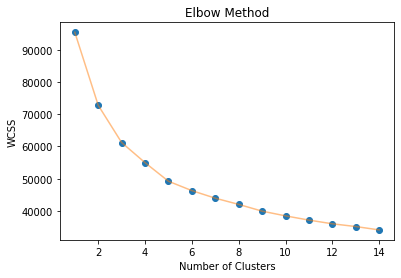

In [15]:
#use elbow method to determine the optimal k
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [16]:
wcss

[95420.12958751821,
 72777.85213254277,
 61229.827219500796,
 54988.18581978536,
 49219.528245608606,
 46312.80764989227,
 43965.47421898705,
 42042.101209136694,
 39946.77526749538,
 38481.45897003659,
 37172.67806168357,
 36026.60152903577,
 35174.423615171334,
 34128.047021150196]

In [17]:
#apply k-means
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

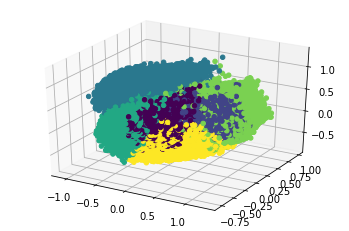

In [18]:
#use PCA to reduce dimension to visualize the data
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
compl_x = pca.fit_transform(scaled)   

ax=plt.subplot(projection='3d')
ax.scatter3D(compl_x[:,0],compl_x[:,1],compl_x[:,2],c=y_kmeans,alpha=1)

plt.savefig('clusters.png')
plt.show()

In [19]:
y_kmeans

array([4, 4, 4, ..., 3, 0, 0])

In [20]:
#clustering result
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

print(kmeans.shape)
kmeans.head()

(134228, 1)


,k_cluster
0,4
1,4
2,4
3,5
4,4


In [21]:
#combine original df with clustering result
df_cluster = pd.concat([X, kmeans], axis=1)

# checking the dataframe
print(df_cluster.shape)
df_cluster.head()

(134228, 15)


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year,k_cluster
0,0.985,0.364,248627.0,0.0552,0.0,0.537,2.0,0.0946,-23.253,4.0,0.0438,123.672,0.3180,1950.0,4
1,0.055,0.754,330000.0,0.7390,0.0,0.871,7.0,0.1090,-6.333,13.0,0.0636,128.005,0.2120,1951.0,4
2,0.990,0.616,152693.0,0.1210,0.0,0.771,4.0,0.3160,-17.309,3.0,0.0641,83.076,0.8480,1952.0,4
3,0.866,0.663,195413.0,0.1500,0.0,0.000,7.0,0.0758,-14.195,11.0,0.3220,69.256,0.6430,1952.0,5
4,0.979,0.184,568880.0,0.0233,0.0,0.947,11.0,0.0940,-30.240,6.0,0.0368,67.309,0.0822,1953.0,4


In [22]:
(df_cluster.isnull().sum()/ df_cluster.shape[0]).sort_values(ascending=False)

k_cluster           0.0
year                0.0
valence             0.0
tempo               0.0
speechiness         0.0
popularity          0.0
loudness            0.0
liveness            0.0
key                 0.0
instrumentalness    0.0
explicit            0.0
energy              0.0
duration_ms         0.0
danceability        0.0
acousticness        0.0
dtype: float64

In [23]:
#average popularity of each cluster
df_cluster.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
2    54.577787
3    45.055173
0    44.813129
1    32.810091
4    29.564640
5    26.878129
Name: popularity, dtype: float64

In [24]:
df_cluster.loc[df_cluster['k_cluster'] == 4][:10]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year,k_cluster
0,0.985,0.364,248627.0,0.0552,0.0,0.537,2.0,0.0946,-23.253,4.0,0.0438,123.672,0.3180,1950.0,4
1,0.055,0.754,330000.0,0.7390,0.0,0.871,7.0,0.1090,-6.333,13.0,0.0636,128.005,0.2120,1951.0,4
2,0.990,0.616,152693.0,0.1210,0.0,0.771,4.0,0.3160,-17.309,3.0,0.0641,83.076,0.8480,1952.0,4
4,0.979,0.184,568880.0,0.0233,0.0,0.947,11.0,0.0940,-30.240,6.0,0.0368,67.309,0.0822,1953.0,4
7,0.980,0.252,165727.0,0.4370,0.0,0.913,7.0,0.1080,-11.070,3.0,0.0352,72.837,0.0361,1953.0,4
10,0.882,0.535,187267.0,0.5750,0.0,0.914,5.0,0.1280,-9.569,5.0,0.0327,88.688,0.5340,1954.0,4
12,0.991,0.421,160464.0,0.0813,0.0,0.929,5.0,0.1200,-21.776,3.0,0.0387,84.728,0.1280,1954.0,4
13,0.954,0.494,210947.0,0.3610,0.0,0.867,2.0,0.1260,-13.016,4.0,0.0417,150.113,0.6580,1954.0,4
14,0.961,0.181,221560.0,0.2770,0.0,0.834,2.0,0.1840,-12.300,3.0,0.0333,91.177,0.1510,1954.0,4
15,0.822,0.307,45773.0,0.3300,0.0,0.976,10.0,0.1280,-14.778,5.0,0.0426,120.685,0.2310,1954.0,4


In [25]:
#descriptive data of features of each cluster
df_cluster.groupby("k_cluster").describe() 

acousticness                                                         \
                 count      mean       std       min      25%      50%    75%   
k_cluster                                                                       
0              33360.0  0.151408  0.167571  0.000000  0.01420  0.08775  0.242   
1              22832.0  0.782380  0.170260  0.000000  0.68700  0.82700  0.916   
2              12335.0  0.163182  0.207302  0.000001  0.01575  0.07540  0.233   
3              32643.0  0.147145  0.167519  0.000000  0.01260  0.08160  0.232   
4              11363.0  0.815702  0.236664  0.000000  0.75800  0.91800  0.978   
5              21695.0  0.636024  0.188736  0.002160  0.50500  0.65900  0.782   

                 danceability            ... valence            year  \
             max        count      mean  ...     75%    max    count   
k_cluster                                ...                           
0          0.896      33360.0  0.567733  ...   0.787  0.994  33360.0   
1          0.996      22832.0  0.443747  ...   0.416  0.855  22832.0   
2          0.996      12335.0  0.675085  ...   0.674  0.981  12335.0   
3          0.933      32643.0  0.576280  ...   0.795  1.000  32643.0   
4          0.996      11363.0  0.399740  ...   0.522  0.990  11363.0   
5          0.995      21695.0  0.595398  ...   0.875  0.999  21695.0   

                                                                           
                  mean        std     min     25%     50%     75%     max  
k_cluster                                                                  
0          1993.565977  15.057872  1950.0  1981.0  1994.0  2007.0  2020.0  
1          1976.885424  18.330162  1950.0  1961.0  1972.0  1991.0  2020.0  
2          2007.882124  10.302828  1950.0  2000.0  2011.0  2017.0  2020.0  
3          1994.186104  14.752589  1950.0  1982.0  1994.0  2007.0  2020.0  
4          1975.509901  19.693760  1950.0  1959.0  1969.0  1991.0  2020.0  
5          1968.839272  12.210525  1950.0  1960.0  1966.0  1975.0  2020.0  

[6 rows x 112 columns]

In [26]:
#output to csv document
df_cluster.to_csv('df_cluster.csv', index=0)

In [27]:
#output to csv document
df_cluster.groupby("k_cluster").describe().to_csv('df_cluster_describe.csv', index=0)

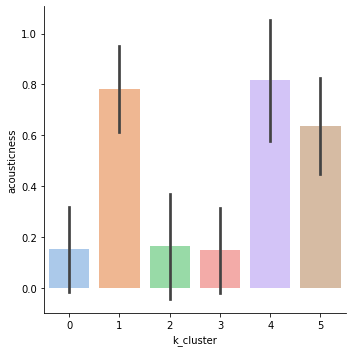

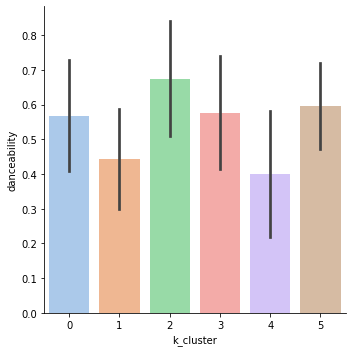

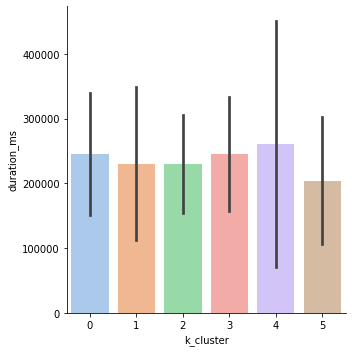

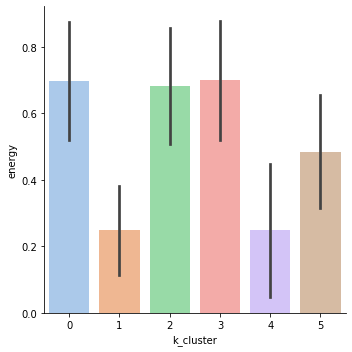

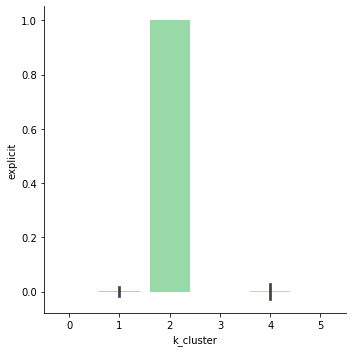

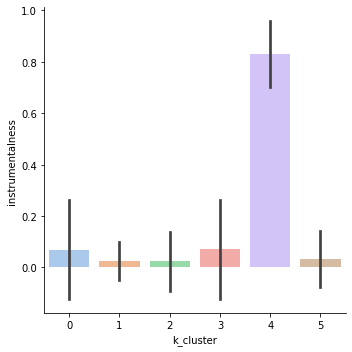

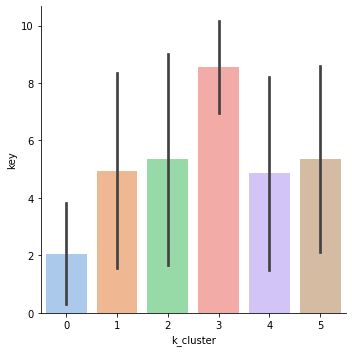

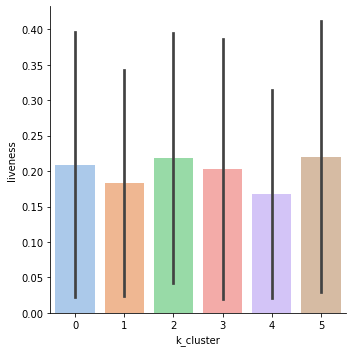

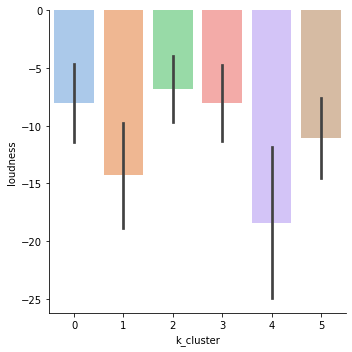

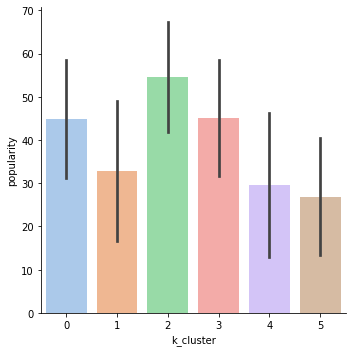

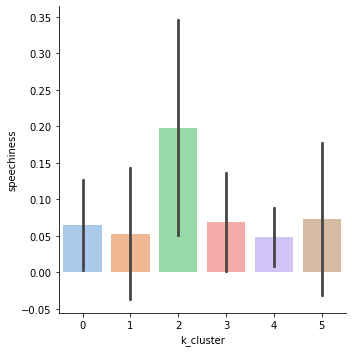

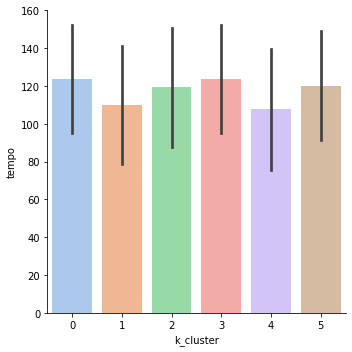

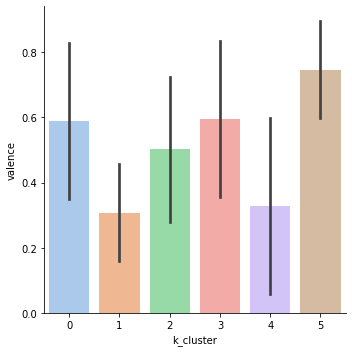

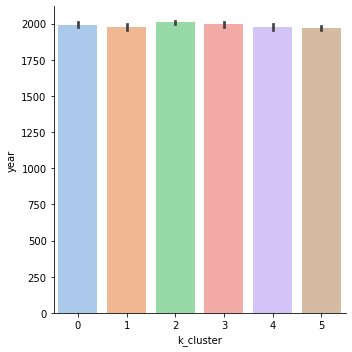

In [28]:
#visualize the descriptive data of each feature of clusters
sns.catplot(data=df_cluster, kind="bar",
                        x="k_cluster", y="acousticness",
                        palette='pastel',
                        ci = 'sd',
                        height=5, aspect = 1)
plt.savefig('acousticness.png')
sns.catplot(data=df_cluster, kind="bar",
                        x="k_cluster", y="danceability",
                        palette='pastel',
                        ci = 'sd',
                        height=5, aspect = 1)
plt.savefig('danceability.png')
sns.catplot(data=df_cluster, kind="bar",
                        x="k_cluster", y="duration_ms",
                        palette='pastel',
                        ci = 'sd',
                        height=5, aspect = 1)
plt.savefig('duration.png')
sns.catplot(data=df_cluster, kind="bar",
                        x="k_cluster", y="energy",
                        palette='pastel',
                        ci = 'sd',
                        height=5, aspect = 1)
plt.savefig('energy.png')
sns.catplot(data=df_cluster, kind="bar",
                        x="k_cluster", y="explicit",
                        palette='pastel',
                        ci = 'sd',
                        height=5, aspect = 1)
plt.savefig('explicit.png')
sns.catplot(data=df_cluster, kind="bar",
                        x="k_cluster", y="instrumentalness",
                        palette='pastel',
                        ci = 'sd',
                        height=5, aspect = 1)
plt.savefig('instrumentalness.png')
sns.catplot(data=df_cluster, kind="bar",
                        x="k_cluster", y="key",
                        palette='pastel',
                        ci = 'sd',
                        height=5, aspect = 1)
plt.savefig('key.png')
sns.catplot(data=df_cluster, kind="bar",
                        x="k_cluster", y="liveness",
                        palette='pastel',
                        ci = 'sd',
                        height=5, aspect = 1)
plt.savefig('liveness.png')
sns.catplot(data=df_cluster, kind="bar",
                        x="k_cluster", y="loudness",
                        palette='pastel',
                        ci = 'sd',
                        height=5, aspect = 1)
plt.savefig('loudness.png')
sns.catplot(data=df_cluster, kind="bar",
                        x="k_cluster", y="popularity",
                        palette='pastel',
                        ci = 'sd',
                        height=5, aspect = 1)
plt.savefig('popularity.png')
sns.catplot(data=df_cluster, kind="bar",
                        x="k_cluster", y="speechiness",
                        palette='pastel',
                        ci = 'sd',
                        height=5, aspect = 1)
plt.savefig('speechiness.png')
sns.catplot(data=df_cluster, kind="bar",
                        x="k_cluster", y="tempo",
                        palette='pastel',
                        ci = 'sd',
                        height=5, aspect = 1)
plt.savefig('tempo.png')
sns.catplot(data=df_cluster, kind="bar",
                        x="k_cluster", y="valence",
                        palette='pastel',
                        ci = 'sd',
                        height=5, aspect = 1)
plt.savefig('valence.png')
sns.catplot(data=df_cluster, kind="bar",
                        x="k_cluster", y="year",
                        palette='pastel',
                        ci = 'sd',
                        height=5, aspect = 1)
plt.savefig('year.png')
plt.show()